<a href="https://colab.research.google.com/github/Anuragk07/Projects_LGM/blob/main/Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium import plugins

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN

In [ ]:
df.shape

(48289, 135)

In [ ]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48289 entries, 0 to 48288
Columns: 135 entries, eventid to related
dtypes: float64(57), int64(21), object(57)
memory usage: 49.7+ MB


In [ ]:
df['iyear'].value_counts()

1989    4324
1990    3887
1988    3721
1984    3495
1991    3328
1987    3183
1985    2915
1983    2870
1986    2860
1979    2662
1980    2662
1981    2586
1982    2544
1978    1526
1977    1319
1976     923
1975     740
1970     651
1974     581
1972     568
1973     473
1971     471
Name: iyear, dtype: int64

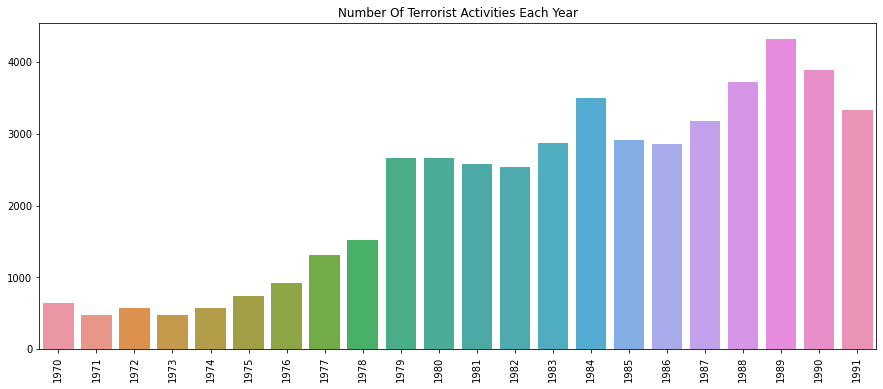

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['iyear'].value_counts().index, df['iyear'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

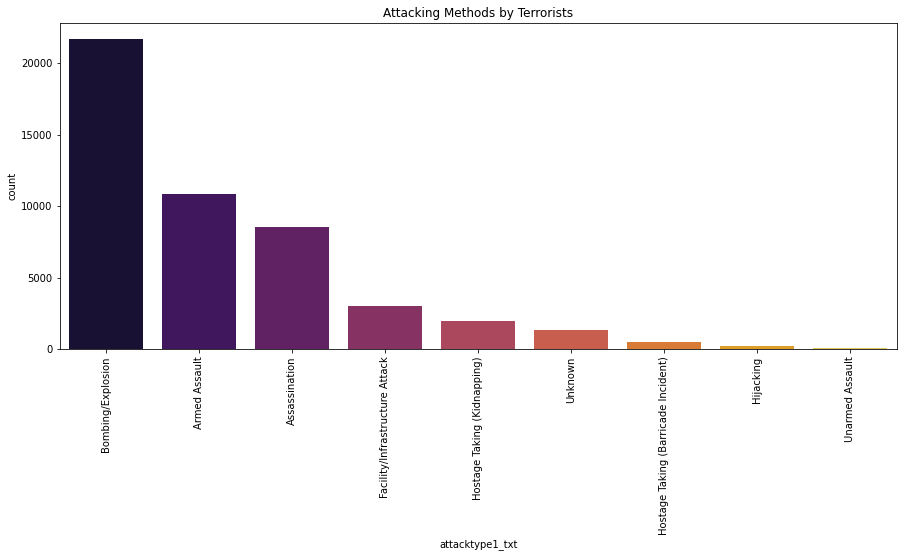

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=df, palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

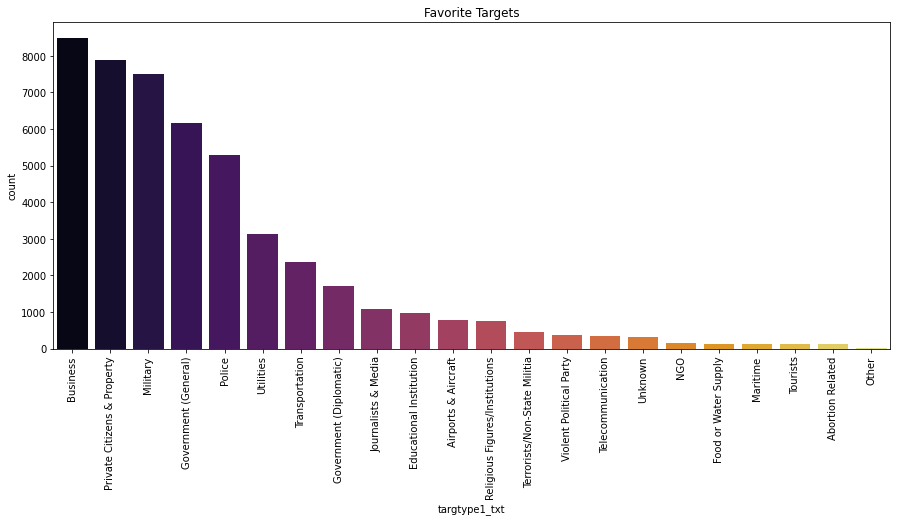

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(df['targtype1_txt'], palette='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

In [ ]:
df['region_txt'].value_counts()

South America                  12792
Western Europe                 10336
Central America & Caribbean     9236
Middle East & North Africa      4877
South Asia                      3993
Sub-Saharan Africa              2414
North America                   2226
Southeast Asia                  1784
East Asia                        308
Eastern Europe                   200
Australasia & Oceania            120
Central Asia                       3
Name: region_txt, dtype: int64

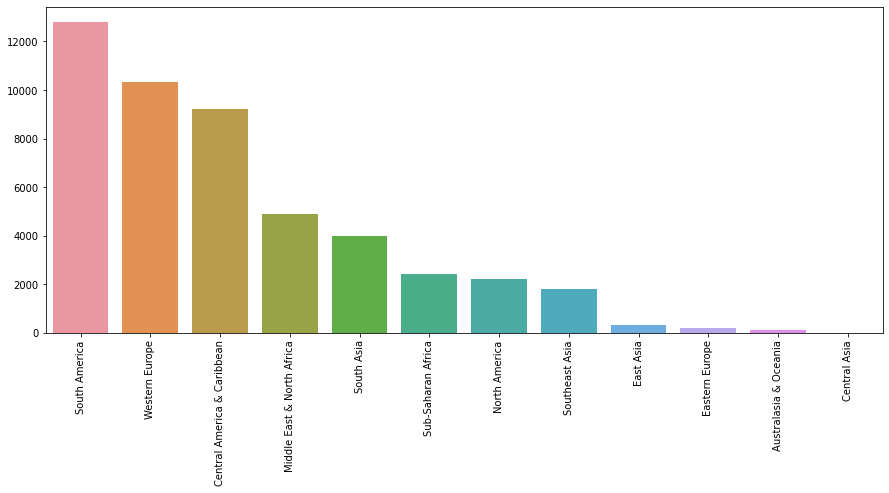

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['region_txt'].value_counts().index, df['region_txt'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print('Country with Highest Terrorist Attacks:', df['country_txt'].value_counts().idxmax() )

print('Region with Highest Terrorist Attacks:', df['region_txt'].value_counts().idxmax() )

print('Maximum people killed in an attack are:',df['nkill'].max(),'that took place in', df.loc[df['nkill'].idxmax(), 'country_txt'])

print("Year with the most attacks:",df['iyear'].value_counts().idxmax())

print("Month with the most attacks:",df['imonth'].value_counts().idxmax())

print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())

print('Terrorist Group with Highest Terror Attacks:', df['gname'].value_counts()[1:10].idxmax())

Country with Highest Terrorist Attacks: Peru
Region with Highest Terrorist Attacks: South America
Maximum people killed in an attack are: 422.0 that took place in Iran
Year with the most attacks: 1989
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion
Terrorist Group with Highest Terror Attacks: Shining Path (SL)


In [ ]:
df['country_txt'].value_counts()

Peru                     5235
El Salvador              5106
Colombia                 4055
United Kingdom           3241
Spain                    2428
                         ... 
Republic of the Congo       1
Falkland Islands            1
Burkina Faso                1
Maldives                    1
Azerbaijan                  1
Name: country_txt, Length: 158, dtype: int64

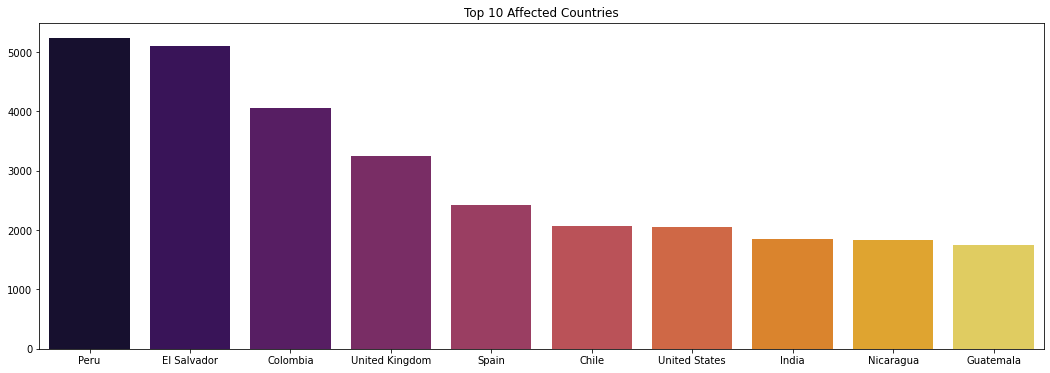

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(df['country_txt'].value_counts()[:10].index, df['country_txt'].value_counts()[:10].values, palette='inferno')
plt.title('Top 10 Affected Countries')
plt.show()

In [ ]:
terror_group=df['gname'].value_counts()

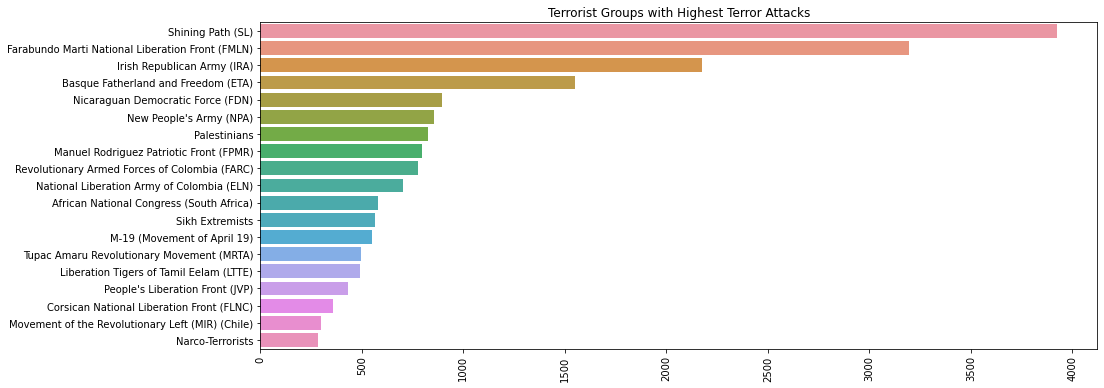

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(terror_group[1:20].values, terror_group[1:20].index)
plt.xticks(rotation=90)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

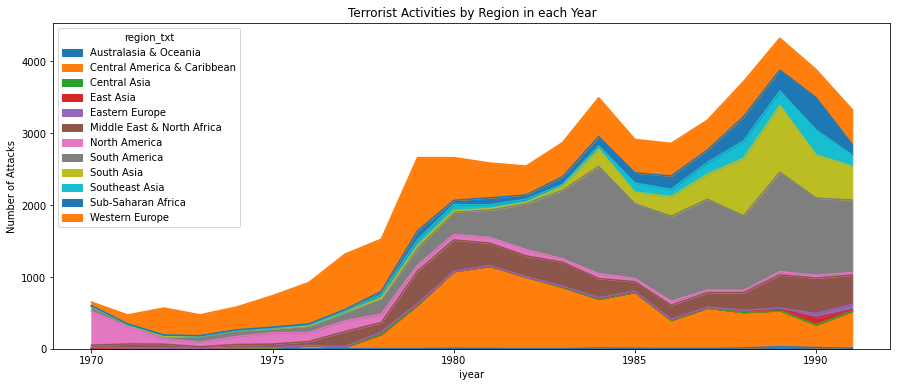

In [ ]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

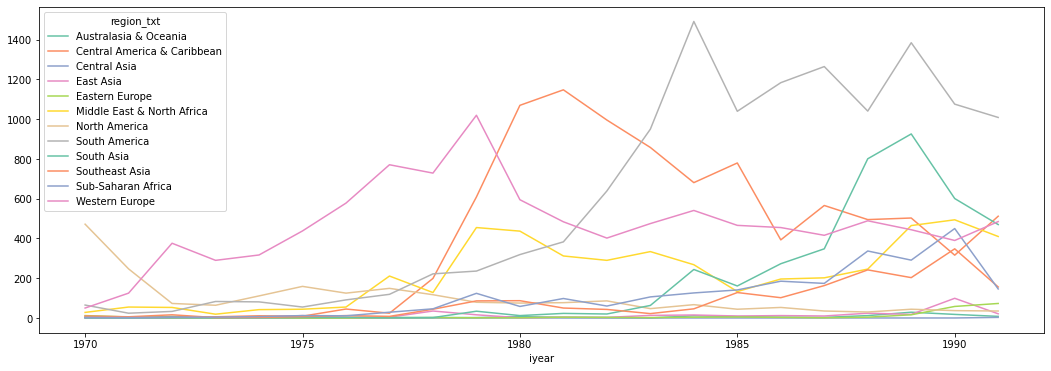

In [ ]:
terror_region=pd.crosstab(df.iyear,df.region_txt)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

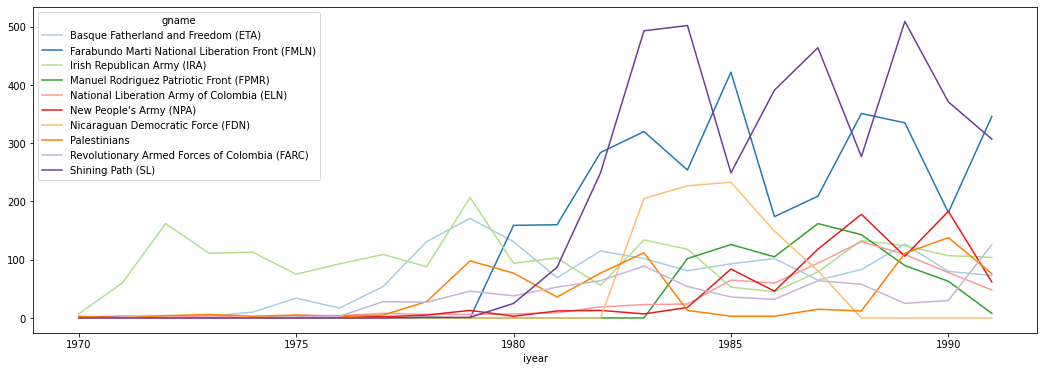

In [ ]:
top_groups10=df[df['gname'].isin(df['gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.gname).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [ ]:
geog=pd.DataFrame({'country': df['country_txt'].value_counts().index,
                   'number_of_attacks': df['country_txt'].value_counts().values})

In [ ]:
geog.head()

,country,number_of_attacks
0,Peru,5235
1,El Salvador,5106
2,Colombia,4055
3,United Kingdom,3241
4,Spain,2428


In [ ]:
fig = px.choropleth(geog, locations="country", 
                    locationmode='country names', color="number_of_attacks", 
                    hover_name="country", range_color=[1, 1000], 
                    color_continuous_scale="blues", 
                    title='Number of terrorist attacks by country')
fig.update(layout_coloraxis_showscale=True)
fig.show()